In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b_theta = np.load("N = 500, Quantile Lorentzian\Endtime = 12600,theta, m = 0.95, backward time.npz.npy")
f_theta = np.load("N = 500, Quantile Lorentzian\Endtime = 12600,theta, m = 0.95, forward time.npz.npy")

"N = 500, Normal/Endotie = theta"

'N = 500, Normal/Endotie = theta'

In [5]:
b_theta.shape
f_theta.shape

(61, 30001, 500)

In [3]:
f_data_cliping == b_data_cliping

NameError: name 'f_data_cliping' is not defined

(-1.1, 1.1)

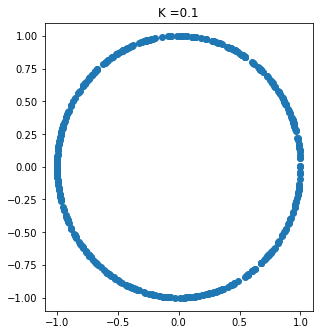

In [12]:
time = 0
# K_num = 19
theta_f =f_theta[:,::500,:].reshape((-1,500))
theta_b =b_theta[:,::500,:].reshape((-1,500))

Ks = np.arange(0.1,12.5+0.2,0.2)
Ks_b = np.arange(12.5,0.1-0.2,-0.2)
temp =np.ones_like(b_theta[0,::500,0])
Ksf = Ks[0]*temp
Ksb = Ks_b[0]*temp
for i in Ks[1:]:
    Ksf = np.r_[Ksf,i*temp]
for i in Ks_b[1:]:
    Ksb= np.r_[Ksb,i*temp]
phase = lambda x: (np.sin(x),np.cos(x))
fig, ax = plt.subplots(1,1,figsize=(4.8,5.3),facecolor="white")
scat = ax.scatter(*phase(theta_f[time]))
ax.set_title(f"K ={Ksf[time]:.01f}")
Ks_=np.r_[Ksf,Ksb]
theta_ = np.r_[theta_f,theta_b]
ax.set_xlim((-1.1,1.1))
ax.set_ylim((-1.1,1.1))


In [34]:
Ksb.shape

(1681,)

In [179]:
theta_.shape

(2562, 500)

In [147]:
temp1 = Ks[0]*temp
for i in Ks[1:]:
    temp1 = np.r_[temp1,i*temp]

In [148]:
temp1.shape

(1891,)

In [114]:
num=0
theta  =  b_data_cliping[num]
x,y  =  phase(theta)
scat.set_array([x,y])

In [13]:
def update_fwbw(num):
    # near_num = t_near_indx[num]
    theta  =  theta_[num]
    x,y  =  phase(theta)
    ax.clear()
    ax.plot(x,y,'.')
    ax.set_title(f"K ={Ks_[num]:.01f}, time = {num*5:.01f}s")
    ax.set_xlim((-1.1,1.1))
    ax.set_ylim((-1.1,1.1))


def update_bw(num):
    # near_num = t_near_indx[num]
    theta  =  theta_b[num]
    x,y  =  phase(theta)
    ax.clear()
    ax.plot(x,y,'.')
    ax.set_title(f"Backward, K ={Ksb[num]:.01f}, time = {(num*5):.01f}s")
    ax.set_xlim((-1.1,1.1))
    ax.set_ylim((-1.1,1.1))

def update_fw(num):
    # near_num = t_near_indx[num]
    theta  =  theta_f[num]
    x,y  =  phase(theta)
    ax.clear()
    ax.plot(x,y,'.')
    ax.set_title(f"Forward, K ={Ksf[num]:.01f}, time = {(num*5):.01f}s")
    ax.set_xlim((-1.1,1.1))
    ax.set_ylim((-1.1,1.1))

In [7]:
from matplotlib import animation
from IPython.display import HTML

In [14]:
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [15]:
animfw = animation.FuncAnimation(fig, update_fw,
         interval = 40, blit = False,frames = len(theta_f))

In [ ]:
HTML(animfw.to_jshtml())

In [17]:
dist = "Quantile Lorentzian"

In [18]:
animfw.save(f'Animation/{dist} Forward, N = 500, m = 0.95.mp4',dpi=400)

In [19]:
animbw = animation.FuncAnimation(fig, update_bw,
         interval = 40, blit = False,frames = len(theta_b))

In [ ]:
HTML(animbw.to_jshtml())

In [21]:
animbw.save('Animation/Backward, N = 500, m = 0.95.mp4',dpi=400)